# Life Expectancy / GDP Portfolio Project


## Scoping out the Data
Below I scoped out the data I was working with to ensure that the columns we're all workable data-types, and looked at the data that I have in front of me.

**Observations** 
- Data looks clean
- 5 Countries
- 16 Years of Data
- 2 quantitative sets of data (Life Expectancy & GDP)

In [87]:
import pandas as pd

df = pd.read_csv('all_data.csv')
print(df.head())
print(df.dtypes)
#print(df.Country.values)
print(df.Year.values)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2000 2001 2002 2003


## Goals of Analysis

**Questions**
- Which countries have the highest average life expectancy?
- Which countries have the highest average GDP?
- Is there a linear correlation between GDP and Life Expectancy? 
 - **Null hypothesis**: there is no correlation between to two samples of GDP and Life Expectancy
 - If not overall correlated, are there correlations within each country?
- Does life expectancy depend on country?
 - **Null Hypothesis:** Life expectancy does not depend on country

## Analysis

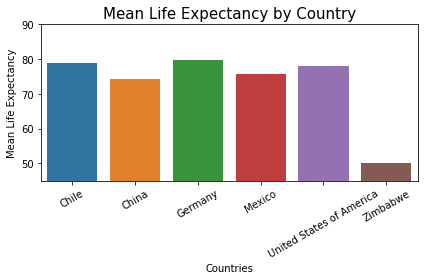

In [86]:
# Which countries have the highest life expectancy?
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

countries = df.Country.unique()
life_exp = []

for country in countries:
    array = df[df['Country']==country]
    life_exp.append(np.mean(array['Life expectancy at birth (years)']))

f, ax1 = plt.subplots()
sns.barplot(data=df, x=countries, y=life_exp)
plt.ylim([45,90])
plt.xlabel('Countries')
plt.ylabel('Mean Life Expectancy', )
plt.title('Mean Life Expectancy by Country', fontsize = 15)
ax1.set_xticklabels(countries, rotation=30)
plt.tight_layout()

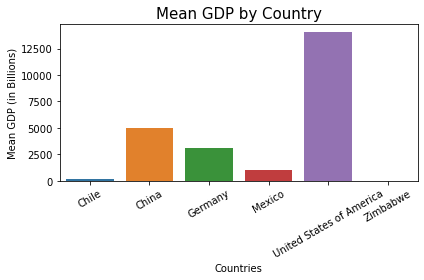

In [70]:
# Which countries have the highest GDP?

gdp = []

for country in countries:
    array = df[df['Country']==country]
    gdp.append(np.mean(array['GDP'])/1000000000)

f, ax2 = plt.subplots()
sns.barplot(data=df, x=countries, y=gdp)
plt.xlabel('Countries')
plt.ylabel('Mean GDP (in Billions)')
plt.title('Mean GDP by Country', fontsize = 15)
ax2.set_xticklabels(countries, rotation=30)
plt.tight_layout()

Text(0, 0.5, 'Life Expectancy')

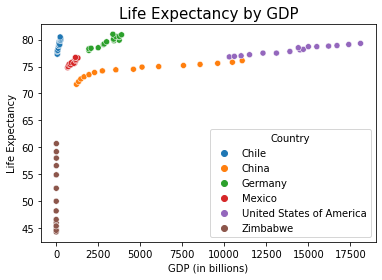

In [69]:
# Is there a correlation between GDP and Life Expectancy?

gdp_all = [x/1000000000 for x in df.GDP.values]
life_exp_all = [x for x in df['Life expectancy at birth (years)']]

f, ax3 = plt.subplots()
sns.scatterplot(data=df, x=gdp_all, y=life_exp_all, hue='Country')
plt.title('Life Expectancy by GDP' ,fontsize = 15)
plt.xlabel('GDP (in billions)')
plt.ylabel('Life Expectancy')

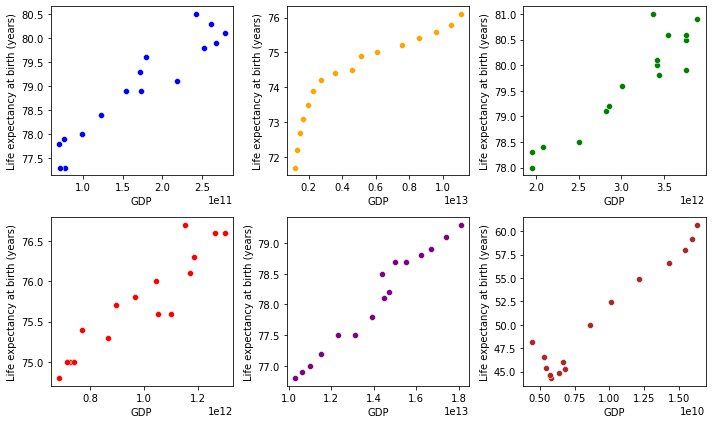

In [85]:
# Is there a correlation within each country?

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.scatterplot(data=df[df['Country']=='Chile'], x='GDP', y='Life expectancy at birth (years)', color='blue')
plt.subplot(2,3,2)
sns.scatterplot(data=df[df['Country']=='China'], x='GDP', y='Life expectancy at birth (years)', color='orange')
plt.subplot(2,3,3)
sns.scatterplot(data=df[df['Country']=='Germany'], x='GDP', y='Life expectancy at birth (years)', color='green')
plt.subplot(2,3,4)
sns.scatterplot(data=df[df['Country']=='Mexico'], x='GDP', y='Life expectancy at birth (years)', color='red')
plt.subplot(2,3,5)
sns.scatterplot(data=df[df['Country']=='United States of America'], x='GDP', y='Life expectancy at birth (years)', color='purple')
plt.subplot(2,3,6)
sns.scatterplot(data=df[df['Country']=='Zimbabwe'], x='GDP', y='Life expectancy at birth (years)', color='brown')
plt.tight_layout()

## Correlation Analysis

Looking at the first graph, it is very clear that there is no linear relationship between overall GDP and overall life expectancy.

However, when broken by country we can see that there is a very clear relationship between GDP and overall life expectancy.

In [54]:
# Does life expectancy depend on country? ANOVA Test
# Chile, China, Germany, Mexico, USA, Zimbabwe

from scipy import stats

chile_le = df[df['Country']=='Chile']['Life expectancy at birth (years)'].values
china_le = df[df['Country']=='China']['Life expectancy at birth (years)'].values
germany_le = df[df['Country']=='Germany']['Life expectancy at birth (years)'].values
mexico_le = df[df['Country']=='Mexico']['Life expectancy at birth (years)'].values
usa_le = df[df['Country']=='United States of America']['Life expectancy at birth (years)'].values
zimbabwe_le = df[df['Country']=='Zimbabwe']['Life expectancy at birth (years)'].values

stats.f_oneway(chile_le, china_le, germany_le, mexico_le, usa_le, zimbabwe_le)

F_onewayResult(statistic=305.22921290515353, pvalue=7.885135700050126e-55)

## ANOVA Analysis

After looking at the ANOVA results, there is a pvalue of 7.88e-55, a VERY low value for datapoints that would suggest the rejection of the Null hypothesis. We can conclude in favor of the null hypothesis that **life expectancy does not depend on the country you live in**.

# Conclusion

**Answers to questions**
- Germany, Chile, and United States of America have the highest Life Expectancy at birth across the years 2000-2015  
- United States of America clearly has the highest mean GDP across the years 2000-2015
- There is no clear linear relationship between GDP and Life Expectancy across all years and countries
- However, there IS a clear linear relationship between GDP and Life Expectancy within each country
- Further analysis indicates that we can conclude in favor of the null hypothesis that life expectancy does not depend on the country you live in
